# Super-K meeting : CNN postprocessing analysis

In [11]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py

In [12]:
# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)

In [13]:
# Import the custom plotting module
from plot_utils import plot_utils

# 1. Import the np arrays with the outputs from the CNN

In [15]:
# Validation run number
run = 8

# Load the np array from the disk into memory
softmaxes = np.load("softmax" + str(run) + ".npy")
labels = np.load("labels" + str(run) + ".npy")
predictions = np.load("predictions" + str(run) + ".npy")
energies = np.load("energies" + str(run) + ".npy")

In [16]:
# Validate the shapes of the loaded array
print("softmaxes shape : ", softmaxes.shape)
print("labels shape : ", labels.shape)
print("predictions shape : ", predictions.shape)
print("energies shape : ", energies.shape)

print(type(energies))
print(type(labels))

softmaxes shape :  (90000, 3)
labels shape :  (90000,)
predictions shape :  (90000,)
energies shape :  (90000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [2]:
h5 = h5py.File("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5")
print(h5.keys())

NameError: name 'h5py' is not defined

In [1]:
h5.close()

NameError: name 'h5' is not defined

In [74]:
energies = np.array(h5["energies"])
labels = np.array(h5["labels"])

In [75]:
print(energies.shape)
print(labels.shape)

print(type(energies))
print(type(labels))

(900000, 1)
(900000,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# 1.b. Transforming the energies into visible

In [41]:
m_mu = 105.7
m_e = 0.511
m_p = 0.511

c = 299792458
beta = 0.75

In [42]:
m_mu_c = m_mu * c * c
m_e_c = m_e * c * c
m_p_c = m_e

In [43]:
dem = math.sqrt(1 - beta**2)

In [44]:
print(dem)

0.6614378277661477


In [45]:
print(m_mu)
print(m_mu_c)

105.7
9.499842239248163e+18


In [76]:
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

In [47]:
print(min(mu_energies))

[364.35886]


In [48]:
for i in range(len(gamma_energies)):
    gamma_energies[i] = max((gamma_energies[i] - (m_e / dem) - (m_p / dem)), 0)
    
for i in range(len(e_energies)):
    e_energies[i] = max((e_energies[i] - (m_e / dem)), 0)
    
for i in range(len(mu_energies)):
    mu_energies[i] = max((mu_energies[i] - (m_mu / dem)), 0)
    

# 2. Plot the energy distribution w.r.t. different particle types

In [17]:
gamma_energies = energies[labels==0]
e_energies = energies[labels==1]
mu_energies = energies[labels==2]

# Extract the energies for various particle types
energies_dict = {}
energies_dict[0] = gamma_energies
energies_dict[1] = e_energies
energies_dict[2] = mu_energies

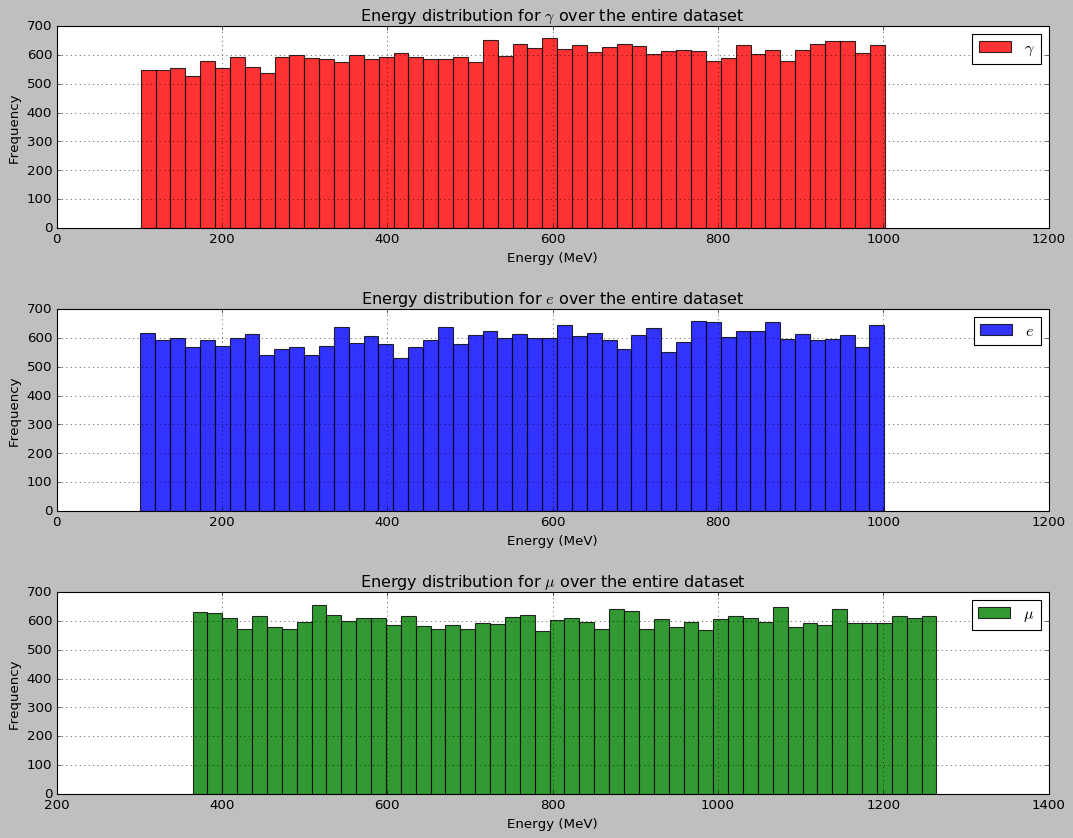

In [18]:
label_dict = {0:["gamma","r"], 1:["e","b"], 2:["mu","g"]}

fig, axes = plt.subplots(3,1,figsize=(16,12))
plt.subplots_adjust(hspace=0.4)

for label in energies_dict.keys():
    label_to_use = r"$\{0}$".format(label_dict[label][0]) if label_dict[label][0] is not "e" else r"${0}$".format(label_dict[label][0])
    axes[label].hist(energies_dict[label], bins=50, density=False, label=label_to_use, alpha=0.8,
                    color=label_dict[label][1])
    axes[label].legend()
    axes[label].grid(True, which="both", axis="both")
    axes[label].set_ylabel("Frequency")
    axes[label].set_xlabel("Energy (MeV)")
    axes[label].set_title("Energy distribution for " + label_to_use + " over the entire dataset")

# 3. Setup the energy intervals to be used for the plots

In [6]:
energy_interval = 200
energy_lb = [energy_interval*i for i in range(math.ceil(max(energies)/energy_interval))]
print(energy_lb)

[0, 200, 400, 600, 800, 1000, 1200]


In [7]:
energy_ub = [i+energy_interval for i in energy_lb]

# 4. Plot the confusion matrix for various energy intervals

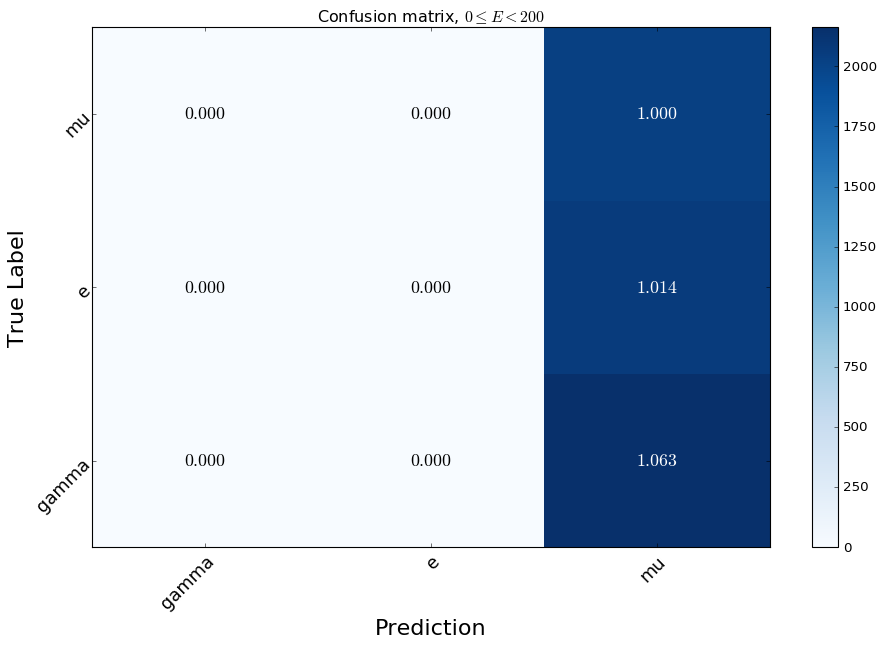

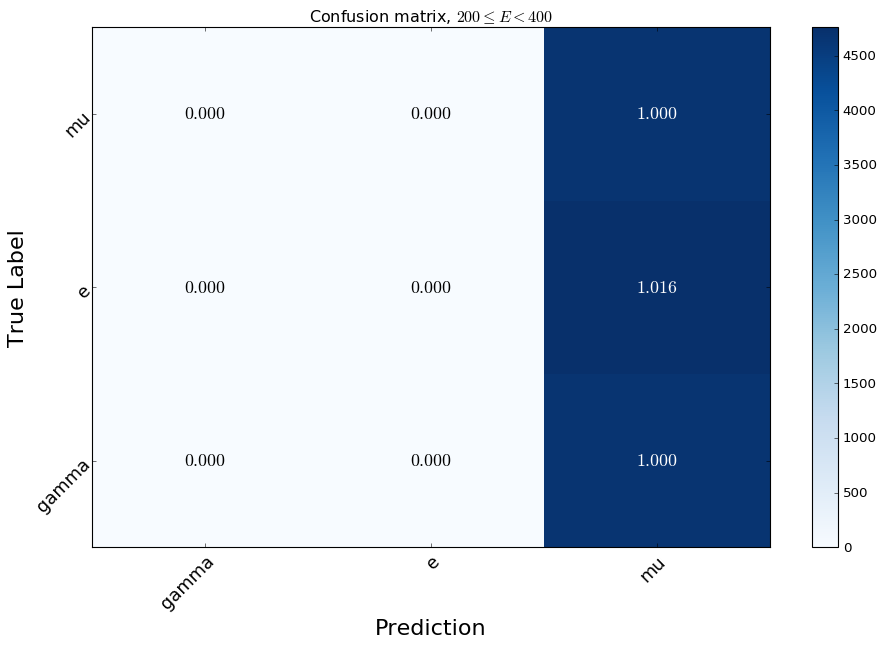

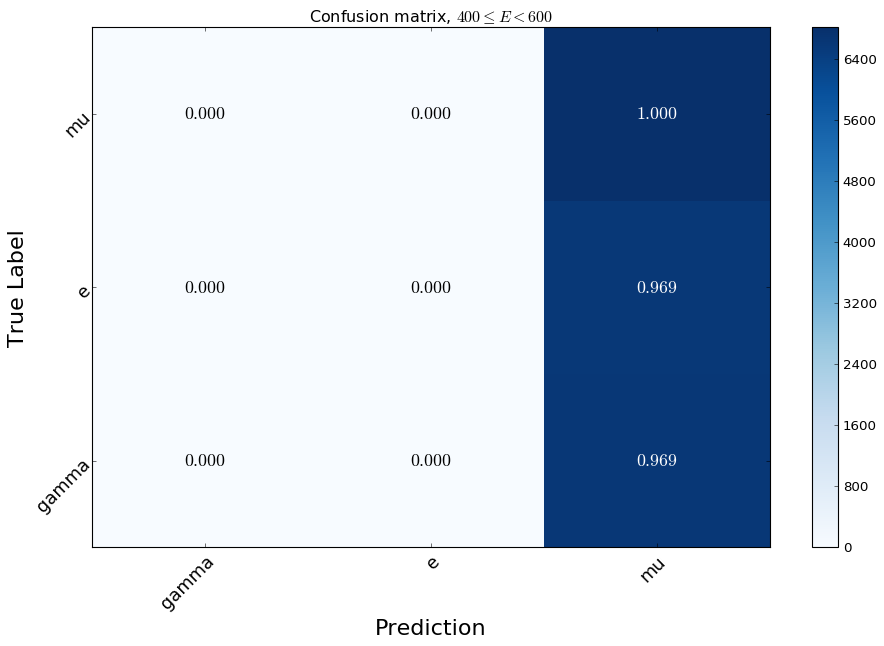

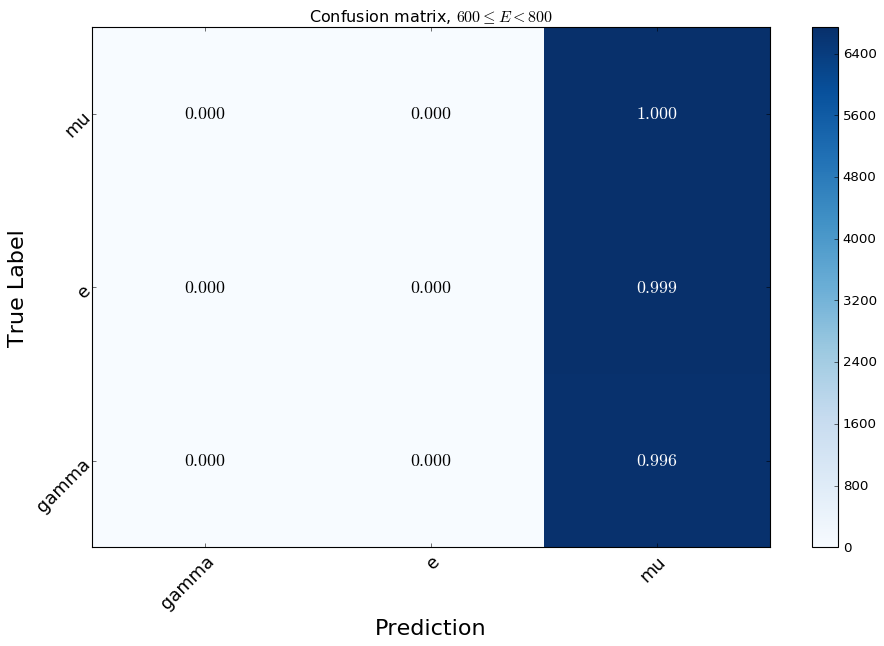

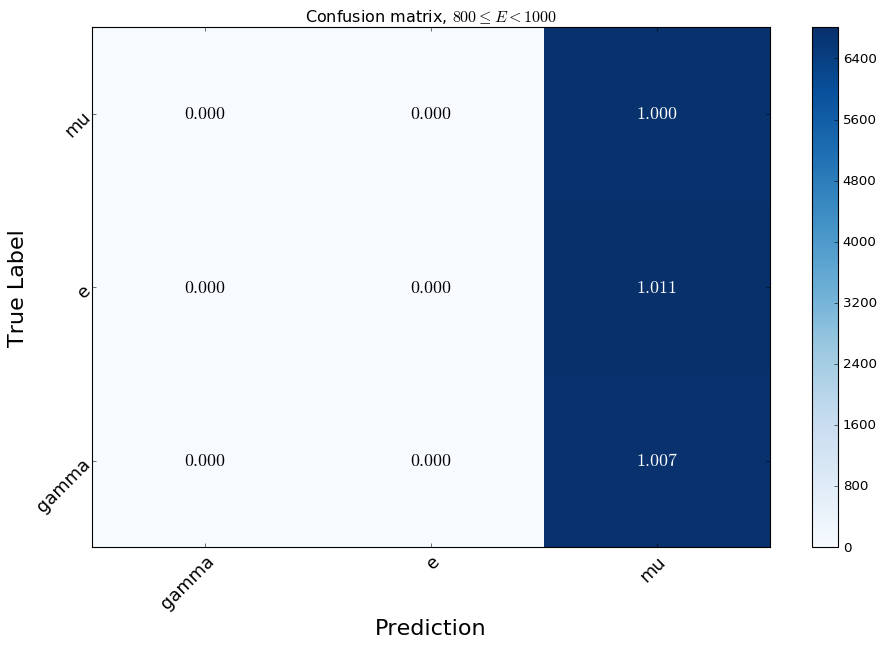

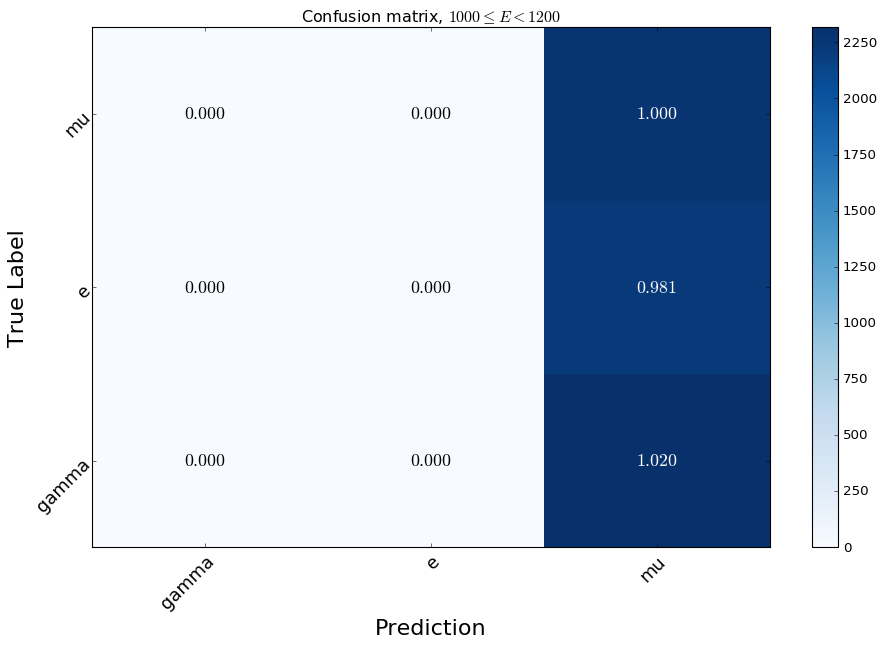

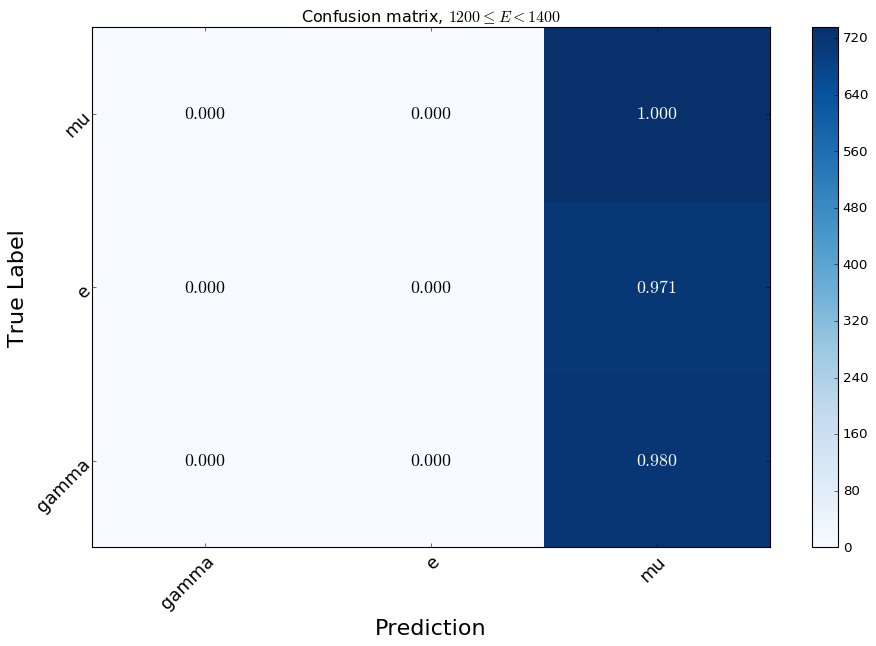

In [15]:
# Iterate over the energy intervals and plot the confusion matrix
for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"], energy_lower, energy_upper)

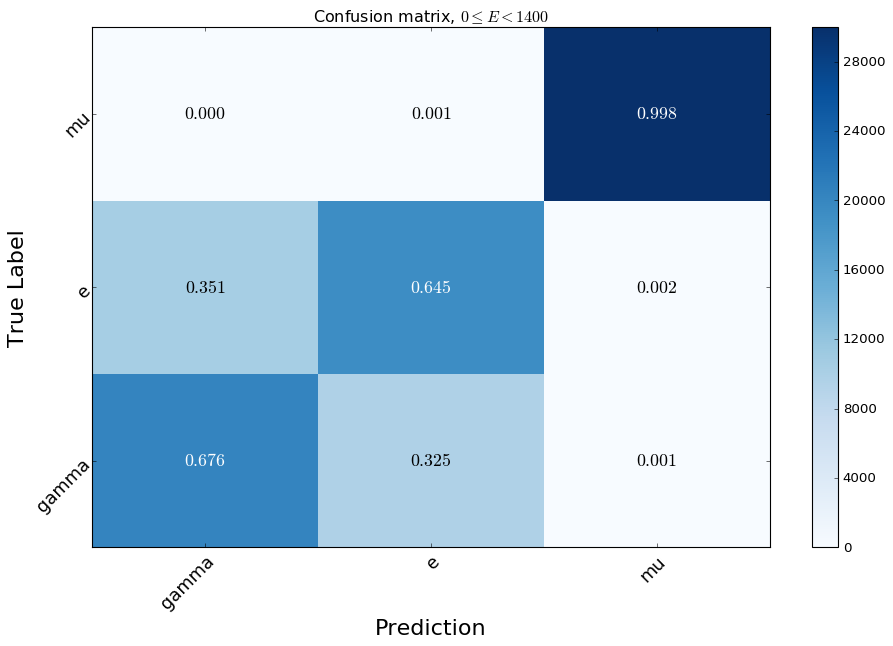

In [19]:
plot_utils.plot_confusion_matrix(labels, predictions, energies, ["gamma", "e", "mu"], 0, 1400)

# 5. Plot the softmax overlap for various energy intervals 

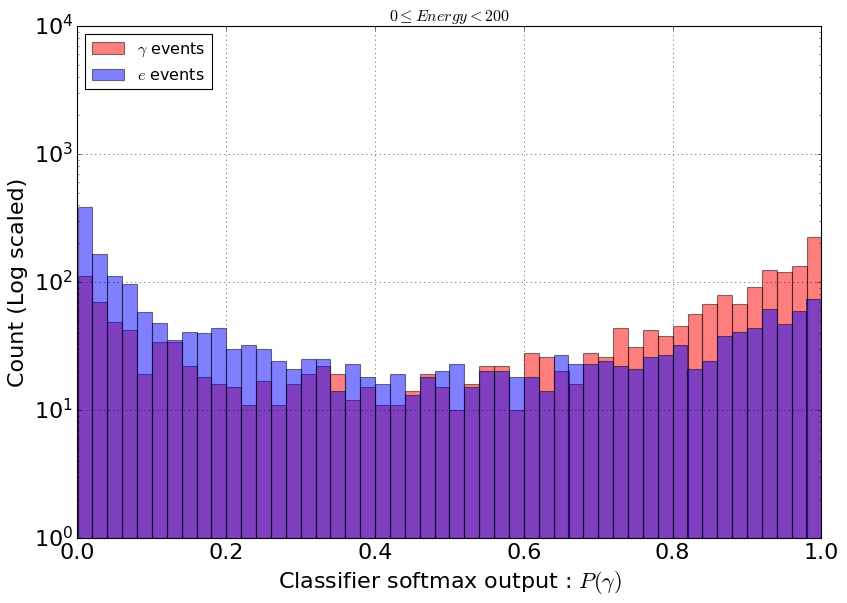

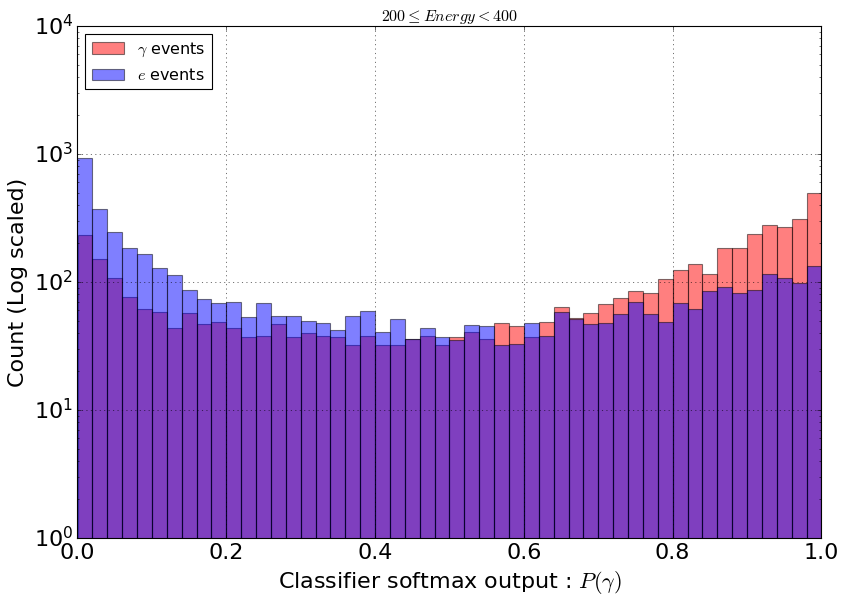

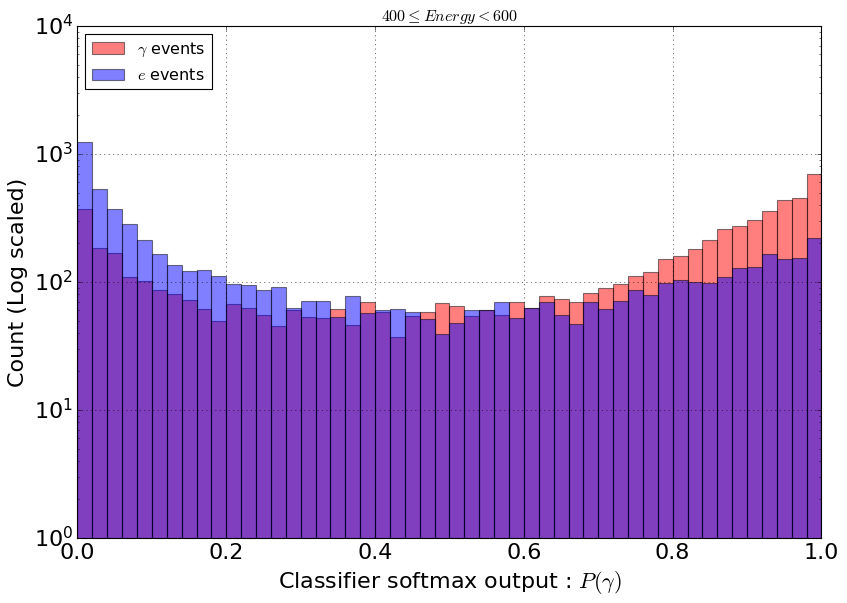

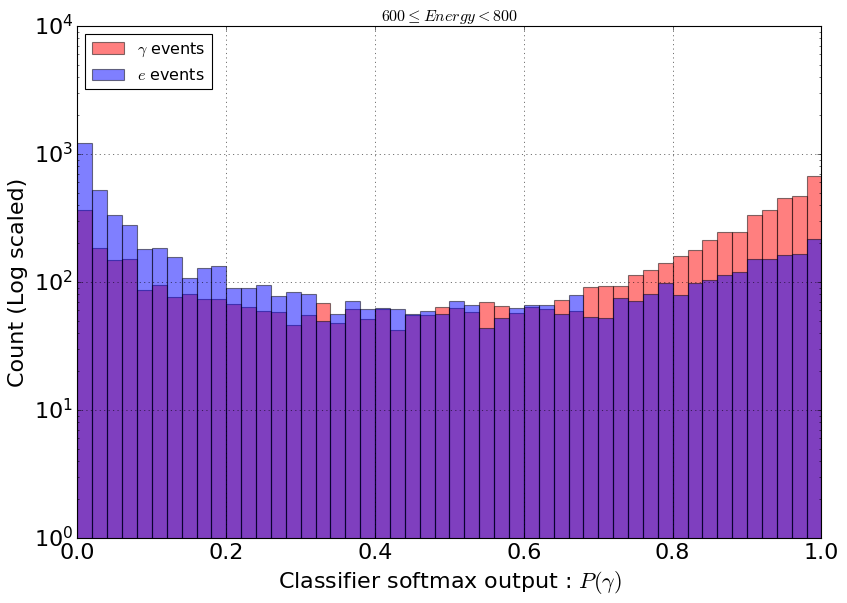

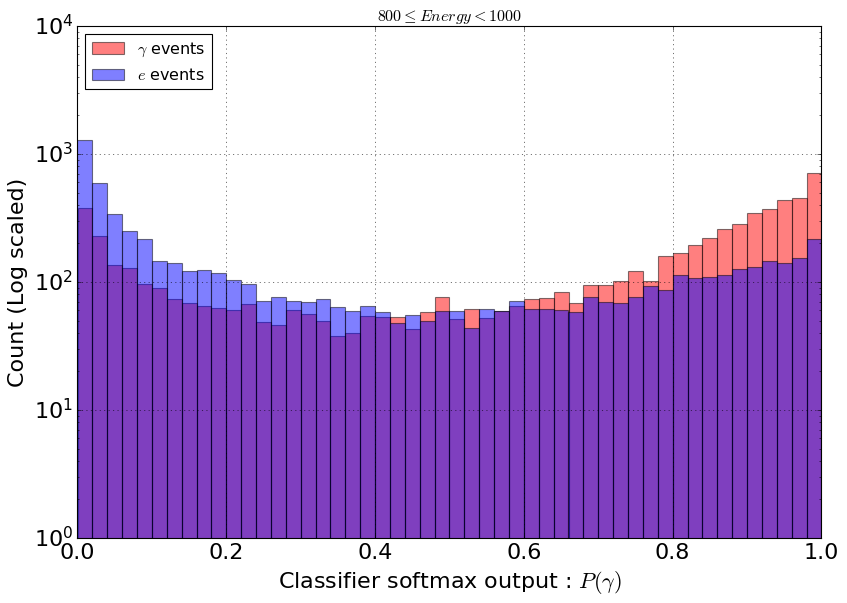

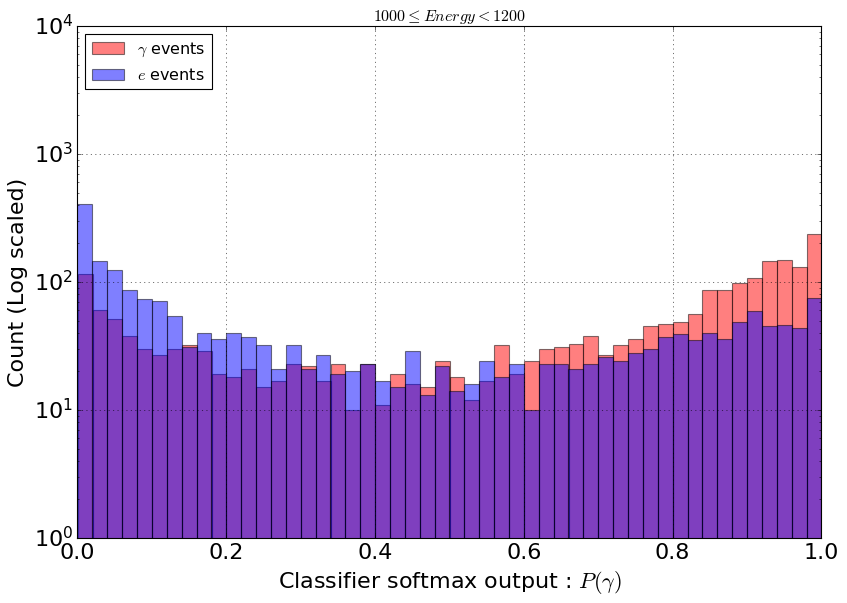

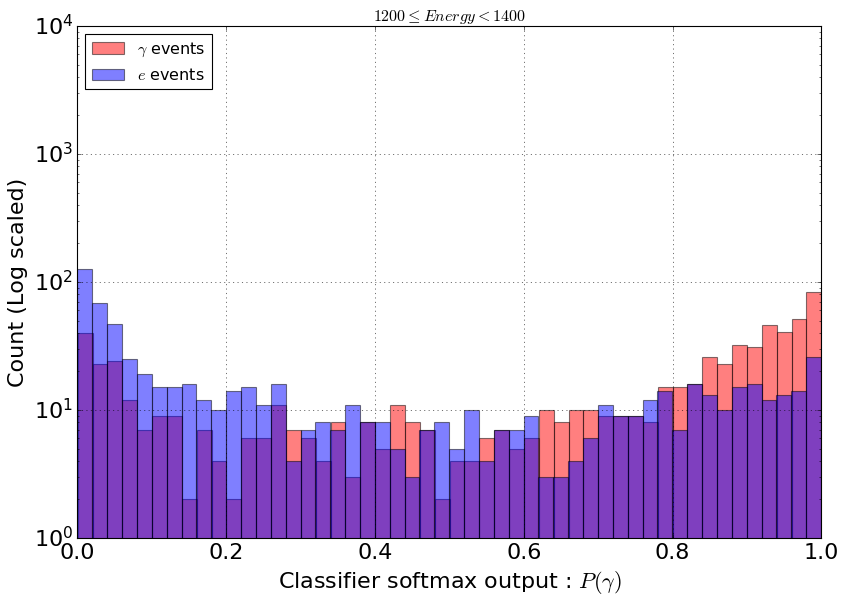

In [27]:
# Iterate over the energy intervals and plot the softmax overlap plots
for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"gamma":0, "e":1},
                                      "gamma", energy_lower, energy_upper)

In [6]:
print(energy_lb, energy_ub)

NameError: name 'energy_lb' is not defined

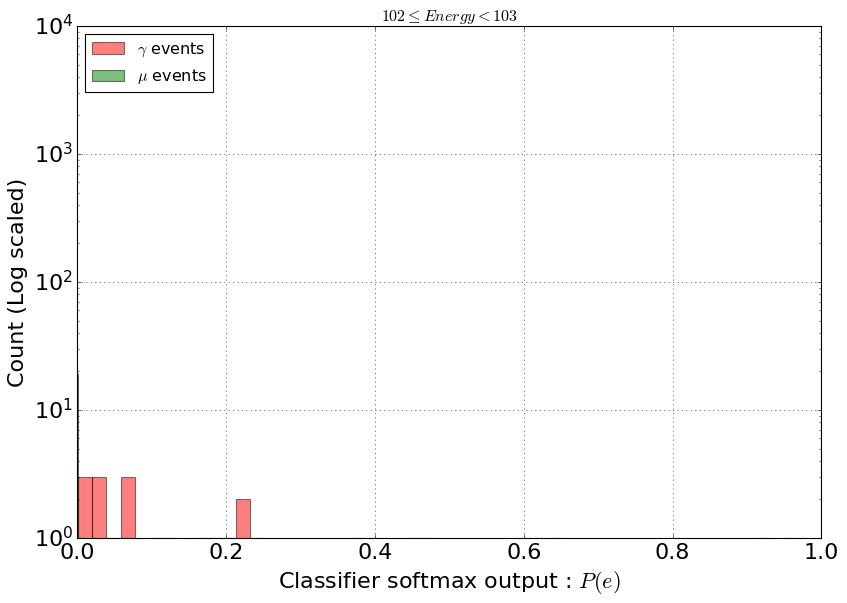

In [14]:
values, bins, _ = plot_utils.plot_particle_histogram(softmaxes, labels, energies,
                                                     {"gamma":0, "mu":2},{"e":1}
                                                     ,102, 103, num_bins=50)

In [15]:
print(values)

[19.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [16]:
print(bins)

[3.6523886e-19 1.4540115e-04 2.9080230e-04 4.3620344e-04 5.8160460e-04
 7.2700571e-04 8.7240688e-04 1.0178080e-03 1.1632092e-03 1.3086103e-03
 1.4540114e-03 1.5994126e-03 1.7448138e-03 1.8902149e-03 2.0356160e-03
 2.1810171e-03 2.3264184e-03 2.4718195e-03 2.6172206e-03 2.7626217e-03
 2.9080228e-03 3.0534239e-03 3.1988253e-03 3.3442264e-03 3.4896275e-03
 3.6350286e-03 3.7804297e-03 3.9258311e-03 4.0712319e-03 4.2166333e-03
 4.3620341e-03 4.5074355e-03 4.6528368e-03 4.7982377e-03 4.9436390e-03
 5.0890399e-03 5.2344413e-03 5.3798421e-03 5.5252435e-03 5.6706448e-03
 5.8160457e-03 5.9614470e-03 6.1068479e-03 6.2522492e-03 6.3976506e-03
 6.5430515e-03 6.6884528e-03 6.8338537e-03 6.9792550e-03 7.1246559e-03
 7.2700572e-03]


In [17]:
print(np.sum(values))

24.0


In [18]:
bins_to_add = values[bins[:len(bins)-1] < 0.5]

In [19]:
print(len(bins))
print(len(bins_to_add))

51
50


In [20]:
print(len(values))

50


In [21]:
print(np.sum(bins_to_add))

24.0


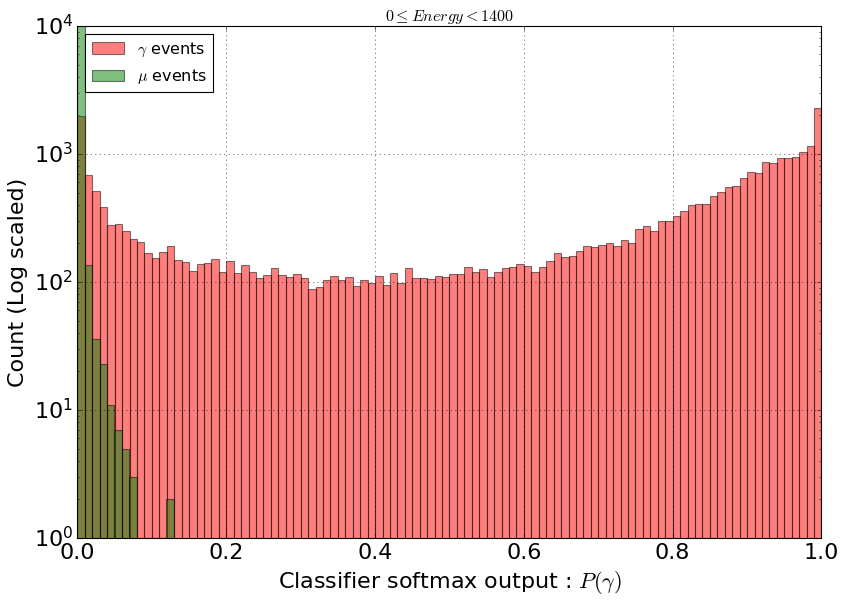

(array([2.9819e+04, 1.3600e+02, 3.6000e+01, 2.3000e+01, 1.1000e+01,
        7.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [29]:
plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"gamma":0, "mu":2},
                                      "gamma", 0, 1400)

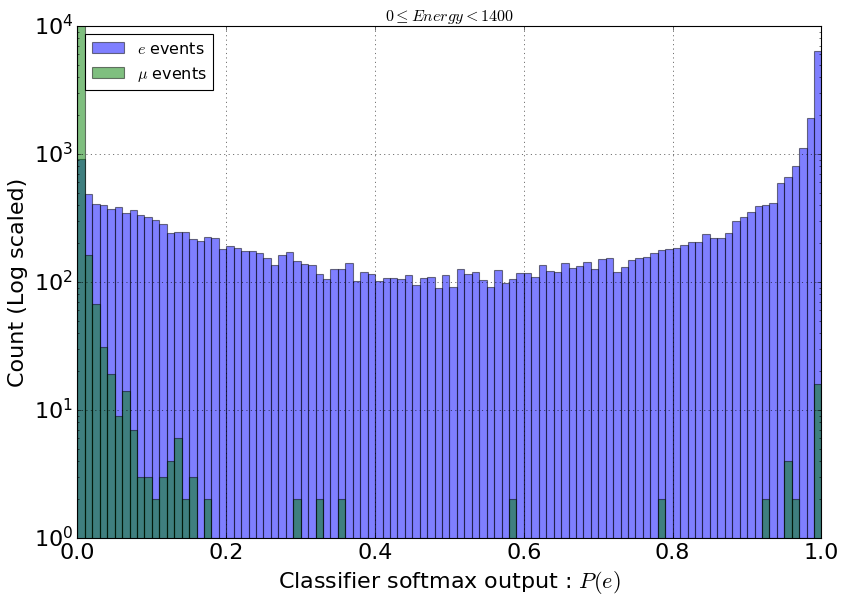

(array([2.9652e+04, 1.6300e+02, 6.7000e+01, 3.1000e+01, 1.9000e+01,
        9.0000e+00, 1.4000e+01, 7.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 6.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

In [30]:
plot_utils.plot_particle_histogram(softmaxes, labels, energies, {"e":1, "mu":2},
                                      "e", 0, 1400)

(0.7045922951771482, 0.7030685994246388)

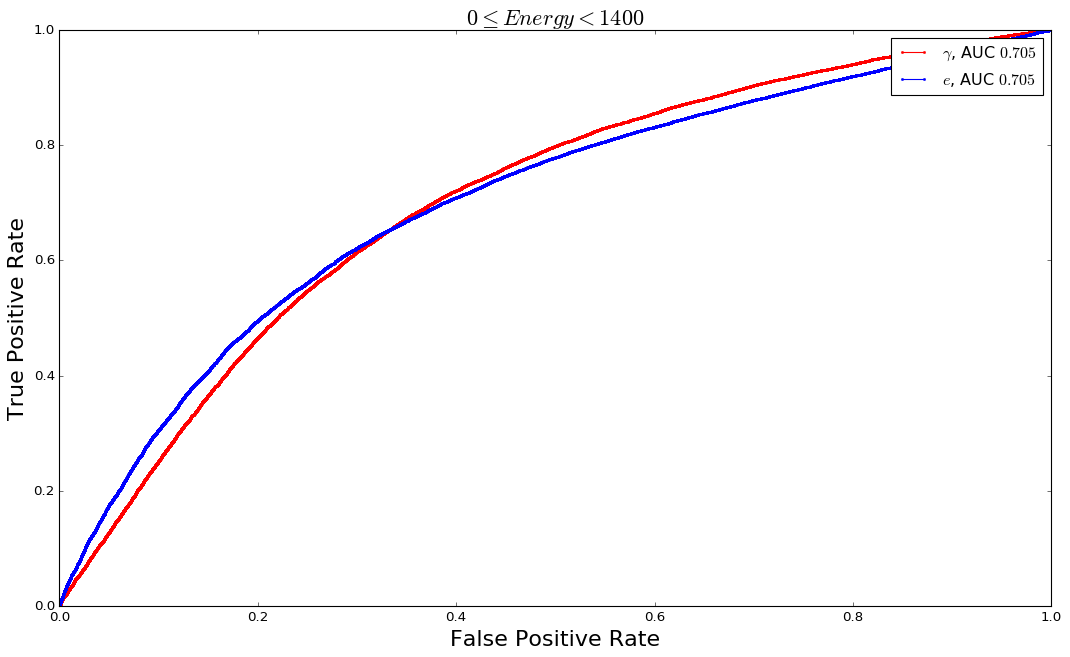

In [31]:
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"gamma":0, "e":1}, "gamma", "e", 0, 1400)

(0.9969046022901017, 0.9996333832016007)

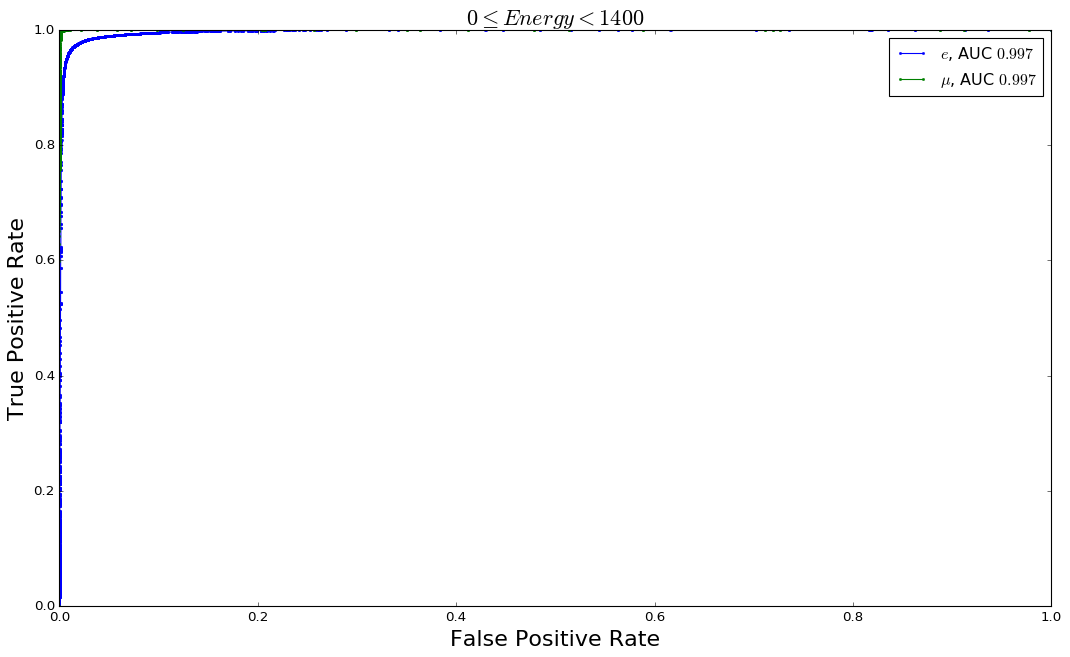

In [32]:
plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies, {"e":1, "mu":2}, "e", "mu", 0, 1400)

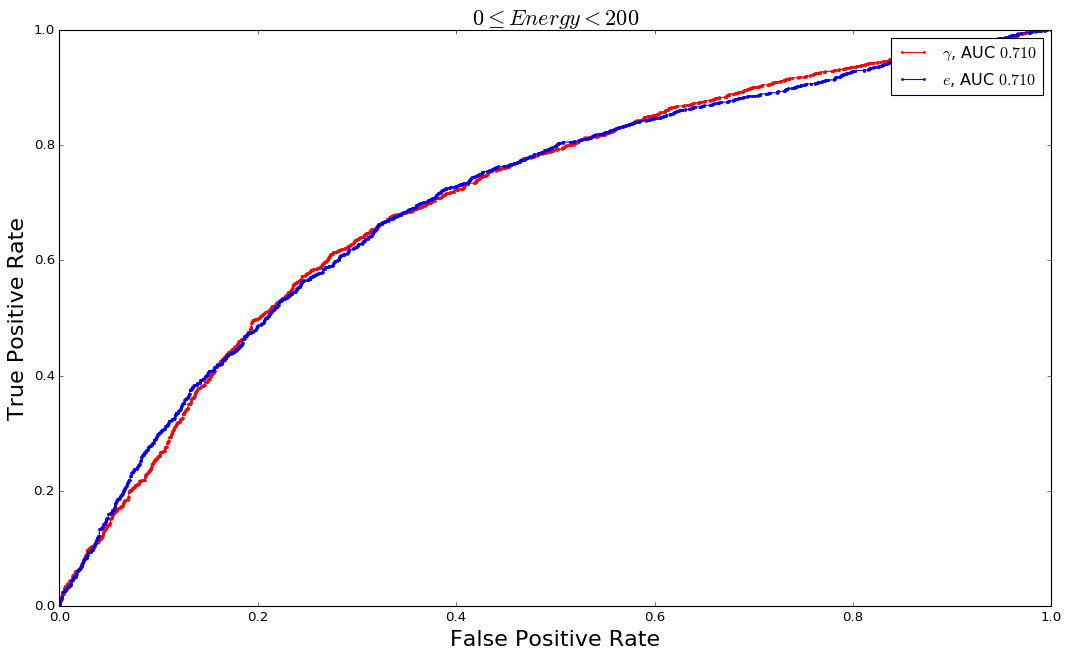

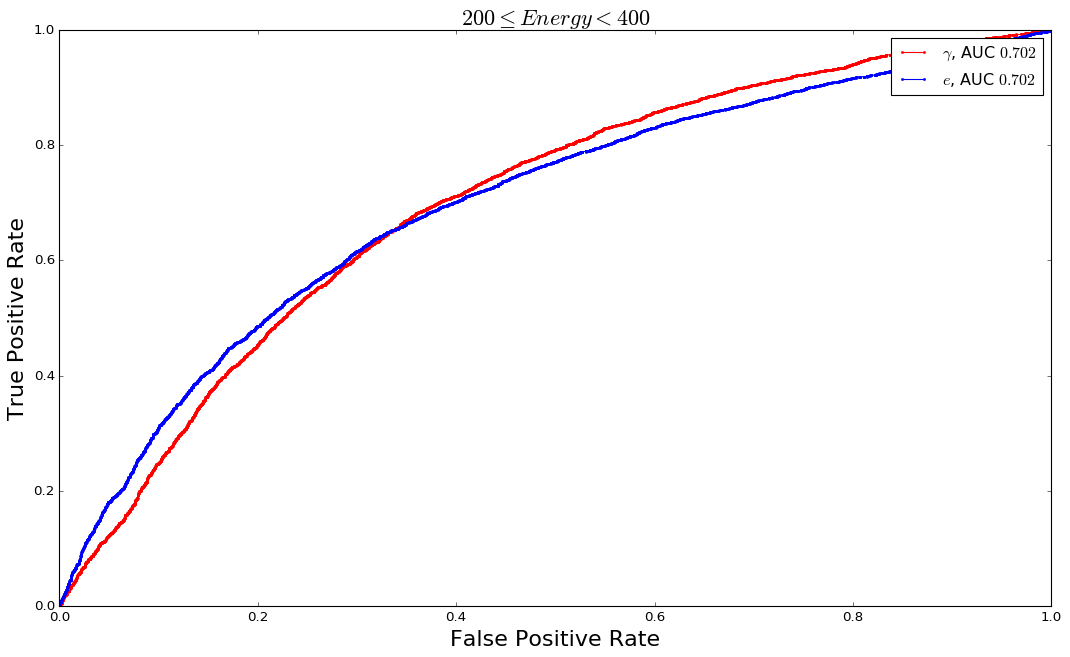

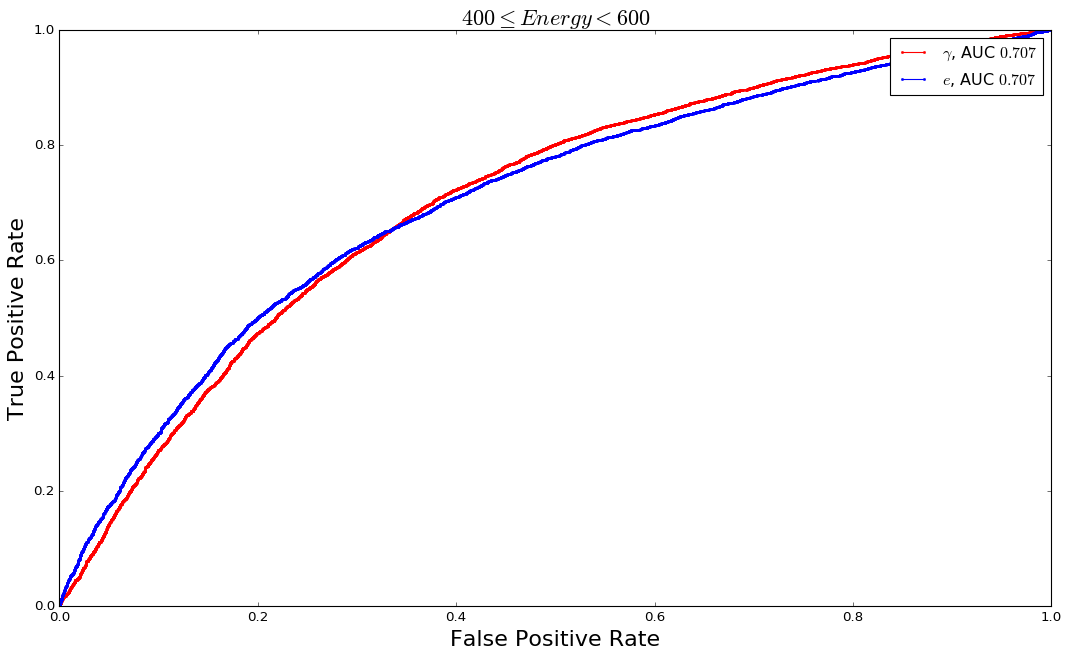

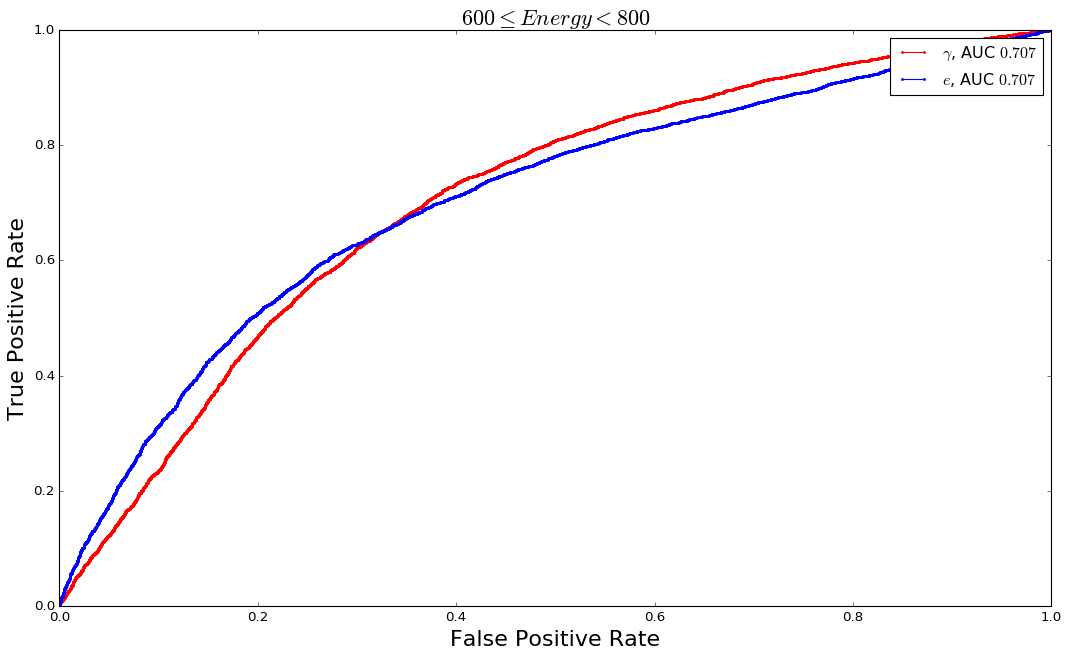

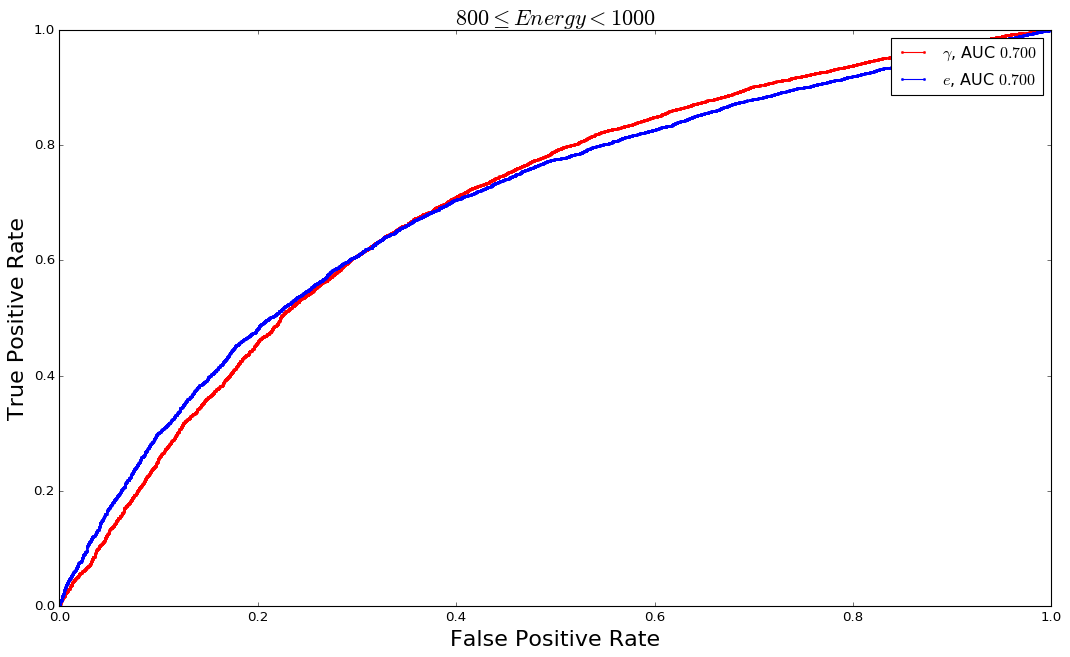

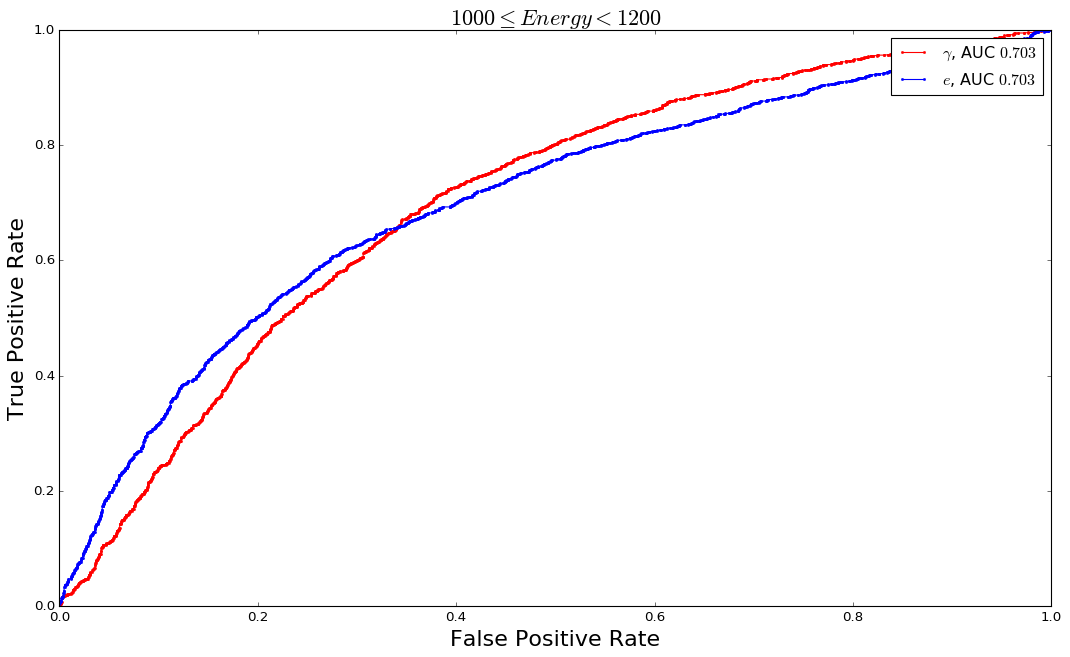

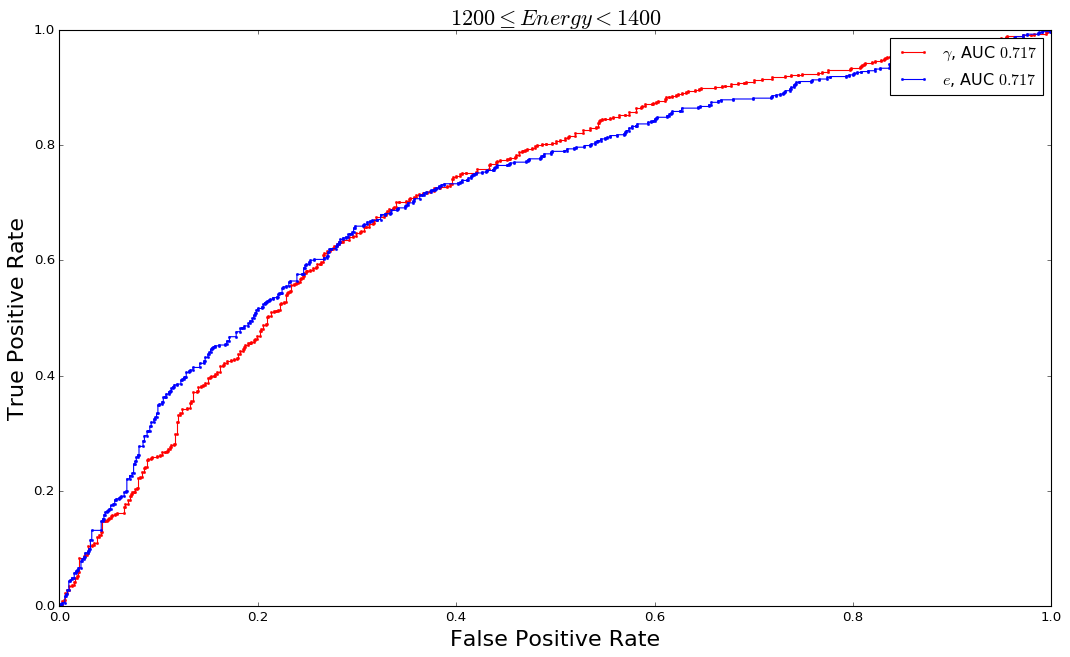

In [33]:
roc_auc_list = []
# Iterate over the energy intervals and plot the softmax overlap plots
for energy_lower, energy_upper in zip(energy_lb, energy_ub):
    roc_auc_list.append(plot_utils.plot_ROC_curve_one_vs_one(softmaxes, labels, energies,
                                         {"gamma":0, "e":1}, "gamma", "e", energy_lower, energy_upper))

In [20]:
print(roc_auc_list)

[(0.6964769732221407, 0.6935527655791396), (0.7092231044337548, 0.705992046244206), (0.7169919922664326, 0.7145935490402421), (0.7182956533187879, 0.7169492157445102), (0.7173769676441469, 0.7154409775397954), (0.7180899119911526, 0.7164505484818542), (0.7076191758884457, 0.7046441604829395)]


In [21]:
auc_gamma = [a[0] for a in roc_auc_list]
auc_e = [a[1] for a in roc_auc_list]

In [22]:
print(auc_gamma)
print(auc_e)

[0.6964769732221407, 0.7092231044337548, 0.7169919922664326, 0.7182956533187879, 0.7173769676441469, 0.7180899119911526, 0.7076191758884457]
[0.6935527655791396, 0.705992046244206, 0.7145935490402421, 0.7169492157445102, 0.7154409775397954, 0.7164505484818542, 0.7046441604829395]


In [33]:
auc_gamma_2 = []
for auc in auc_gamma:
    auc_gamma_2.append(auc)
    auc_gamma_2.append(auc)
  
auc_e_2 = []
for auc in auc_e:
    auc_e_2.append(auc)
    auc_e_2.append(auc)

In [34]:
energies_x = []
for low, high in zip(energy_lb, energy_ub):
    energies_x.append(low)
    energies_x.append(high)

In [35]:
print(energies_x)

[0, 200, 200, 400, 400, 600, 600, 800, 800, 1000, 1000, 1200, 1200, 1400]


In [36]:
print(auc_gamma_2)

[0.6964769732221407, 0.6964769732221407, 0.7092231044337548, 0.7092231044337548, 0.7169919922664326, 0.7169919922664326, 0.7182956533187879, 0.7182956533187879, 0.7173769676441469, 0.7173769676441469, 0.7180899119911526, 0.7180899119911526, 0.7076191758884457, 0.7076191758884457]


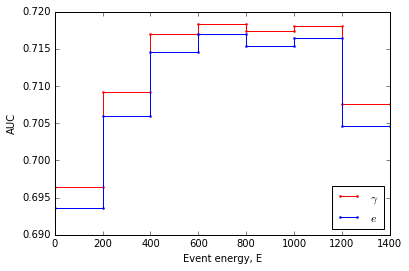

In [42]:
%matplotlib inline

plt.plot(energies_x, auc_gamma_2, color="r",
         label=r"$\{0}$".format("gamma"),
         linewidth=1.0, marker=".",
         markersize=4.0, markerfacecolor="r")

plt.plot(energies_x, auc_e_2, color="b",
         label=r"${0}$".format("e"),
         linewidth=1.0, marker=".",
         markersize=4.0, markerfacecolor="b")

plt.xlabel(r"Event energy, E")
plt.ylabel(r"AUC")
plt.legend(loc="lower right")

plt.show()

# Plot the signal efficiency

In [19]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1}, particle="e",
                       threshold=0.5, energy_interval=25, energy_min=100, num_bins=100, 
                       save_path=None)

TypeError: plot_signal_efficiency() got an unexpected keyword argument 'threshold'

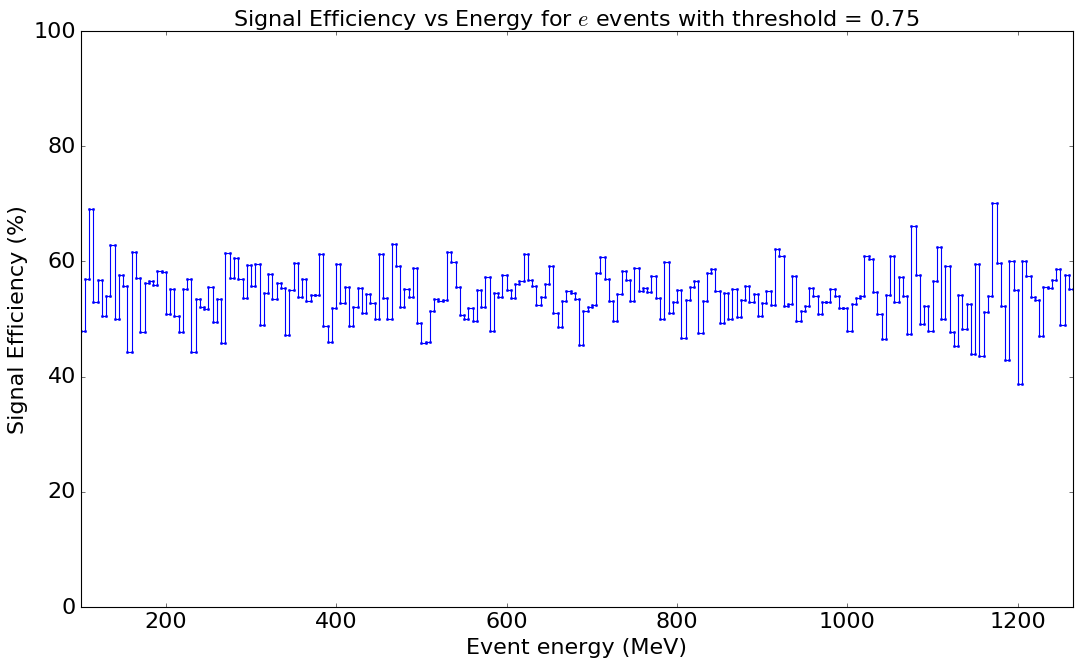

In [35]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1}, particle="e",
                       threshold=0.75, energy_interval=5, energy_min=100, num_bins=100, 
                       save_path=None)

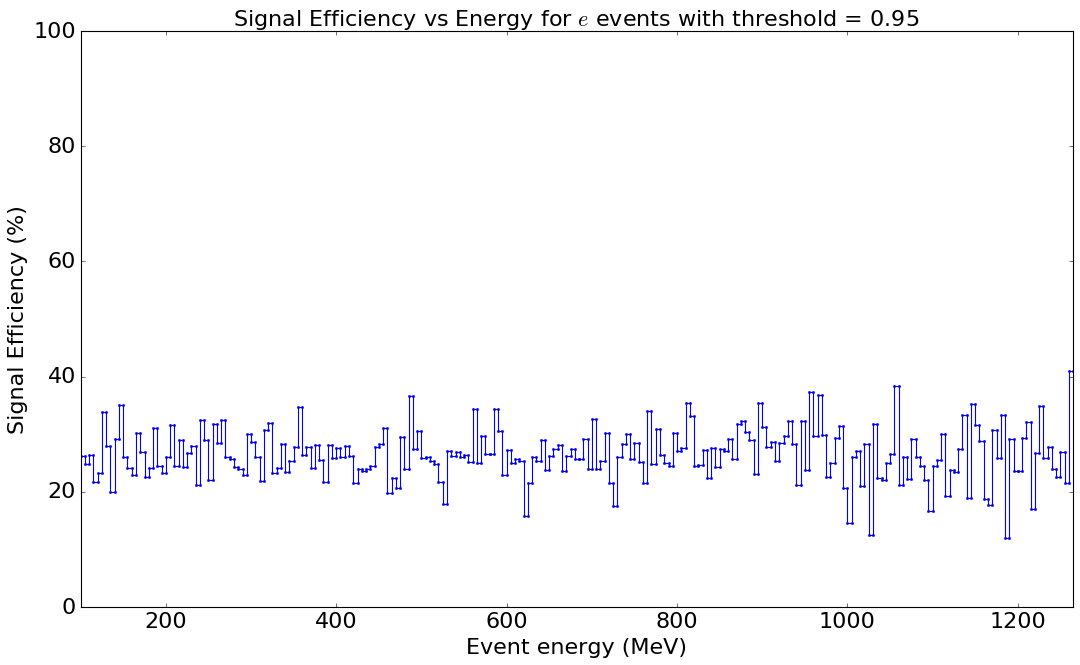

In [8]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1}, particle="e",
                       threshold=0.95, energy_interval=1, energy_min=100, num_bins=100, 
                       save_path=None)

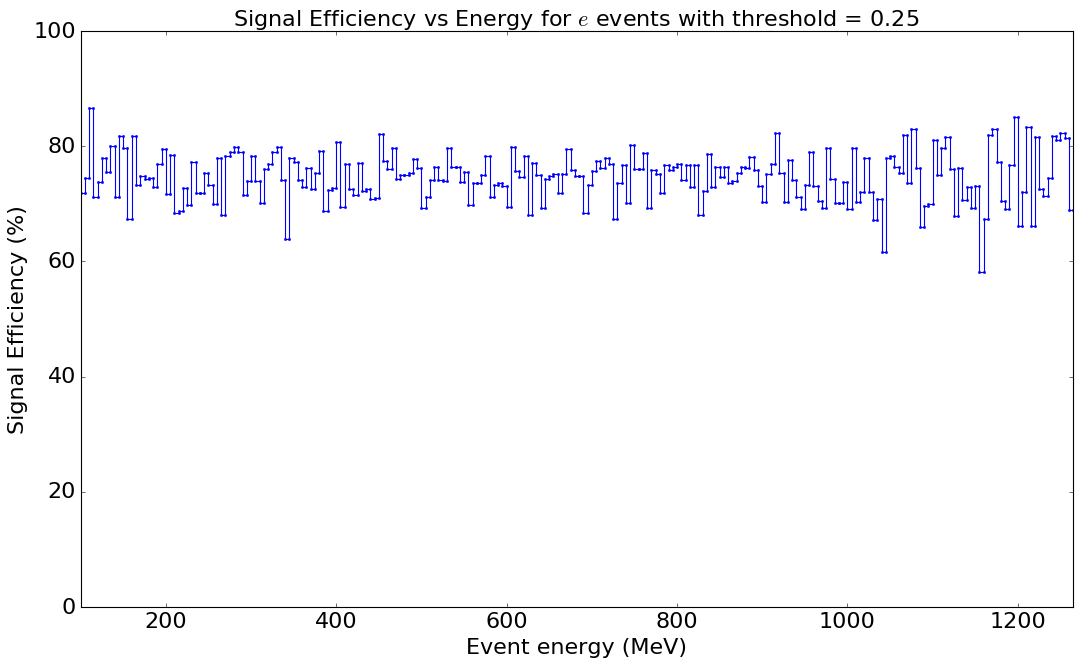

In [6]:
plot_utils.plot_signal_efficiency(softmaxes, labels, energies, index_dict={"e":1}, particle="e",
                       threshold=0.25, energy_interval=5, energy_min=100, num_bins=100, 
                       save_path=None)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

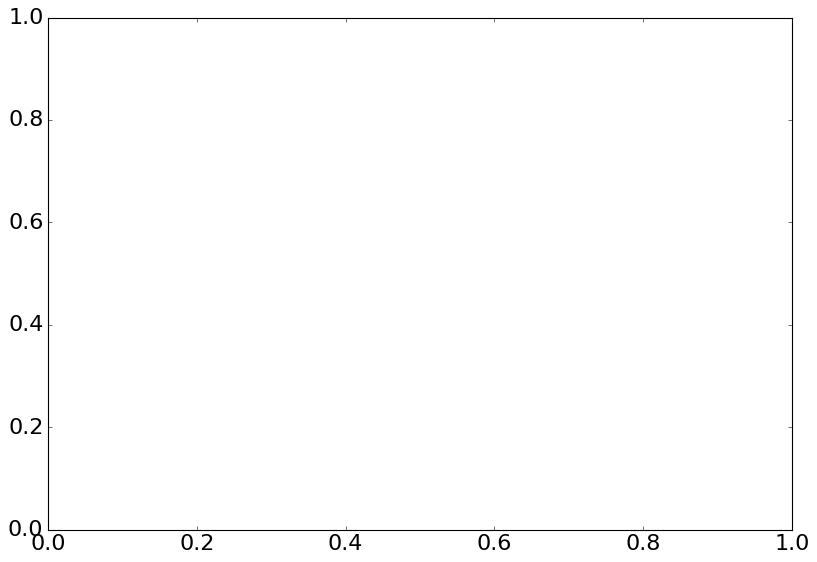

In [6]:
plot_utils.plot_background_rejection(softmaxes, labels, energies, index_dict={"gamma":0, "e":1, "mu":2},
                                     particle="e", threshold=0.5, energy_interval=5, energy_min=100,
                                     num_bins=100, save_path=None)